## Testing Kernels





In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
train = pd.read_json('./data/train.json')
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [11]:
train.shape

(1604, 5)

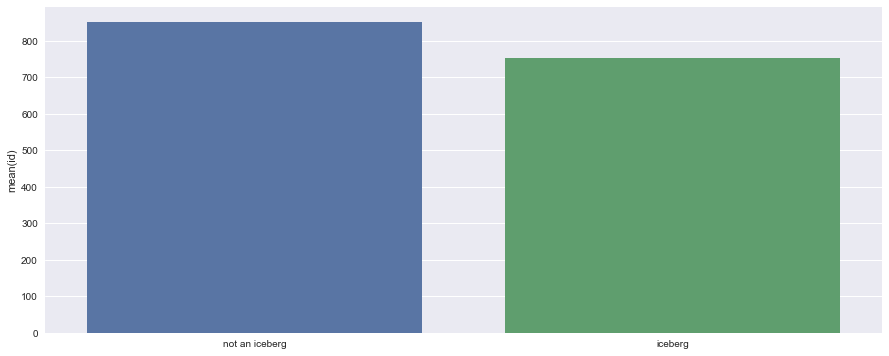

In [8]:
f,ax = plt.subplots(1,1,figsize=(15,6))
sns.barplot(x=['not an iceberg','iceberg'],y=train.groupby(['is_iceberg'],as_index=False).count()['id'])
plt.show()

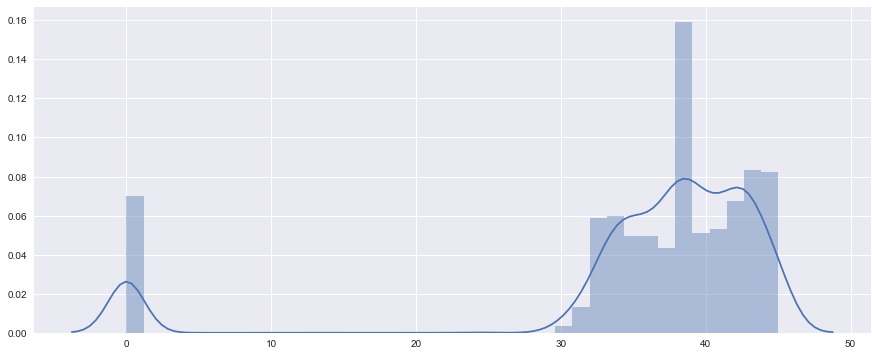

In [9]:
f,ax = plt.subplots(1,1,figsize=(15,6))
angles = [int(float(t)) if t!='na' else 0 for t in train['inc_angle']]
train['intangle'] = angles
sns.distplot(angles)
plt.show()

In [13]:
from PIL import Image

def normalizeArrays(data,i):
    arr1 = np.reshape(data['band_1'][i],(75,75))
    arr1 = arr1+ abs(np.asarray(arr1).min())
    arr1 = np.asarray(arr1/np.asarray(arr1).max())

    arr2 = np.reshape(data['band_2'][i],(75,75))
    arr2 = arr2+ abs(np.asarray(arr2).min())
    arr2 = np.asarray(arr2/np.asarray(arr2).max())
    
    return arr1,arr2

norm =[normalizeArrays(train,i) for i in range(len(train))]
train['norm1'] = [t[0] for t in norm]
train['norm2'] = [t[1] for t in norm]

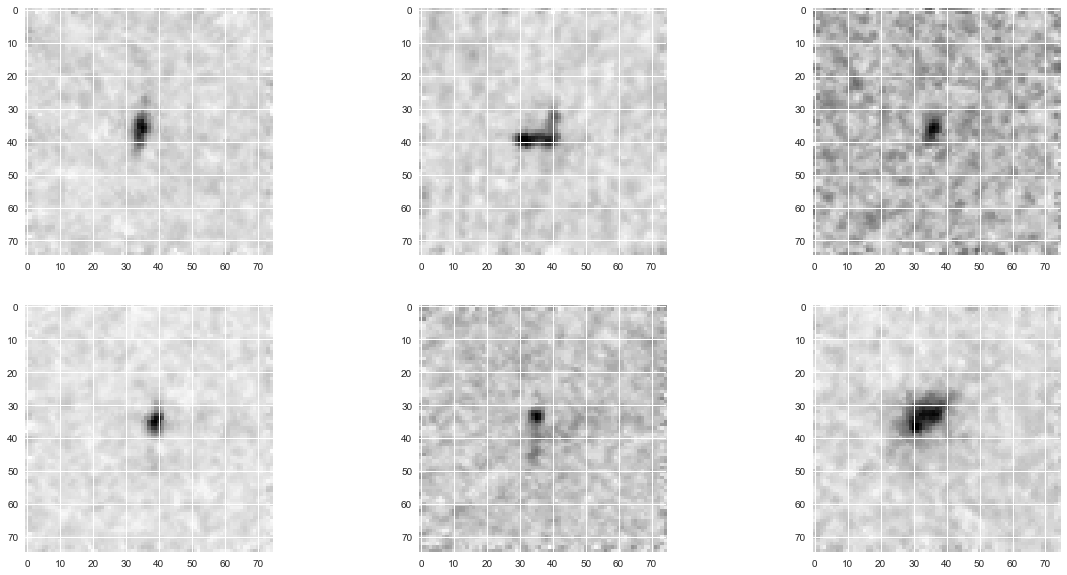

,band_1,band_2,id,inc_angle,is_iceberg,norm1,norm2
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0,"[[0.271934135243, 0.290992945539, 0.2511370069...","[[0.467872773059, 0.388104711706, 0.3381541114..."
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0,"[[0.304880658235, 0.229859615094, 0.2298579902...","[[0.0936374879513, 0.194808956985, 0.233271482..."
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1,"[[0.374371653562, 0.374370034662, 0.3629817081...","[[0.500344767335, 0.542318909515, 0.7277624799..."
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0,"[[0.263502471624, 0.246523660165, 0.2217885287...","[[0.343275240707, 0.354143574492, 0.3645680621..."
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0,"[[0.320930571766, 0.422236065143, 0.4222360651...","[[0.42374534115, 0.324780935052, 0.32478093505..."


In [18]:
from PIL import ImageFilter
f,axarr = plt.subplots(2,3,figsize=(20,10))
iarray = []
for i in range(6):
    img = Image.fromarray(train['norm1'][i]*255)
    img = img.convert('L')
    img = img.filter(ImageFilter.SMOOTH_MORE)
    iarray.append(img)    
axarr[0][0].imshow(iarray[0])
axarr[0][1].imshow(iarray[1])
axarr[0][2].imshow(iarray[2])
axarr[1][0].imshow(iarray[3])
axarr[1][1].imshow(iarray[4])
axarr[1][2].imshow(iarray[5])

plt.show()
train.head()

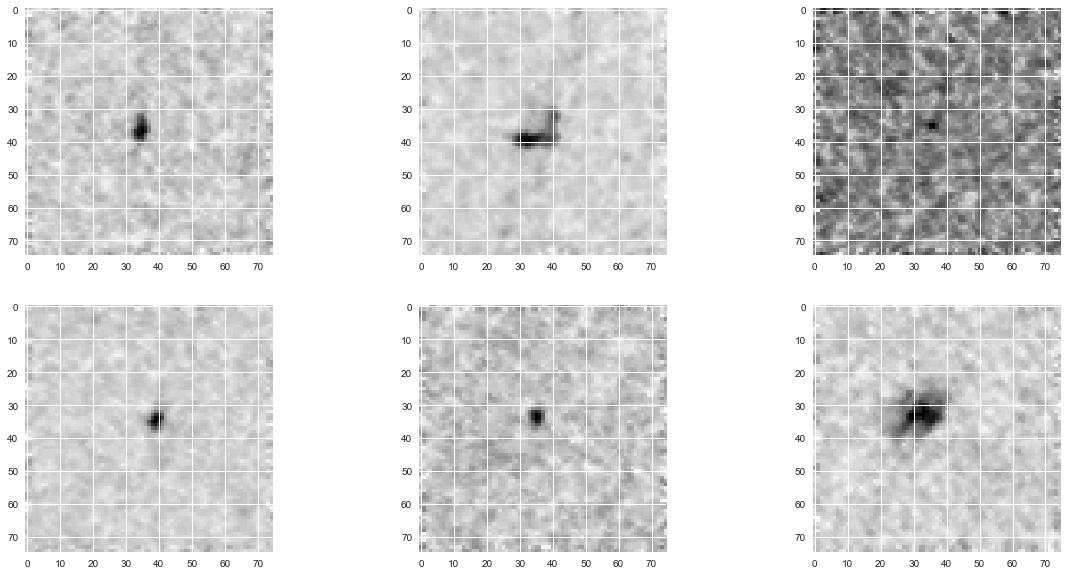

In [19]:
from PIL import ImageFilter
f,axarr = plt.subplots(2,3,figsize=(20,10))
iarray = []
for i in range(6):
    img = Image.fromarray(train['norm2'][i]*255)
    img = img.convert('L')
    img = img.filter(ImageFilter.SMOOTH_MORE)
    iarray.append(img)    
axarr[0][0].imshow(iarray[0])
axarr[0][1].imshow(iarray[1])
axarr[0][2].imshow(iarray[2])
axarr[1][0].imshow(iarray[3])
axarr[1][1].imshow(iarray[4])
axarr[1][2].imshow(iarray[5])
plt.show()

In [23]:
max1 = [pd.Series(train['band_1'][i]).max() for i in range(len(train))]
max2 = [pd.Series(train['band_2'][i]).max() for i in range(len(train))]
mean1 = [pd.Series(train['band_1'][i]).mean() for i in range(len(train))]
mean2 =[pd.Series(train['band_2'][i]).mean() for i in range(len(train))]
min1 = [pd.Series(train['band_1'][i]).min() for i in range(len(train))]
min2 = [pd.Series(train['band_2'][i]).min() for i in range(len(train))]
train['min1'] = min1
train['min2'] = min2
train['max1'] = max1
train['max2'] = max2
train['mean1'] = mean1
train['mean2'] = mean2
len(train)

1604

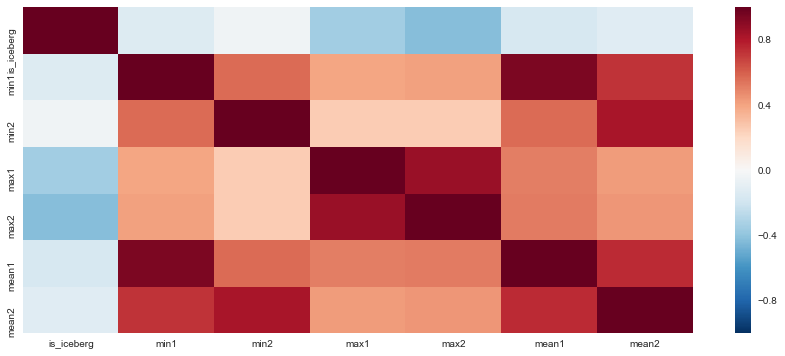

In [21]:
import seaborn as sns
f,axarr = plt.subplots(1,1,figsize=(15,6))
sns.heatmap(train.corr())
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

clf = GradientBoostingClassifier(n_estimators = 50,random_state=0)
features = ['min1','min2','max1','max2','mean1','mean2']
scores = cross_val_score(clf,train[features],train['is_iceberg'], cv=3)
clf.fit(train[features],train['is_iceberg'])
scores

array([ 0.77943925,  0.72523364,  0.74719101])